In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt


In [2]:
def load_csv(filepath):
    data =  []
    col = []
    checkcol = False
    with open(filepath,encoding="utf8") as f:
        for val,i in zip(f.readlines(),range(10000)):
            val = val.replace("\,",";")
            val = val.replace("\n","")
            val = val.split(',')
            if checkcol is False:
                col = val
                checkcol = True
            else:
                data.append(val)
    df = pd.DataFrame(data=data, columns=col)
    return df

In [3]:
df=load_csv("train.csv")
df.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,Pete The Cat Bedtime Blues Doll; 14.5 Inch,Pete the Cat is the coolest; most popular cat ...,[Pete the Cat Bedtime Blues plush doll;Based o...,MerryMakers,0
1,The New Yorker NYHM014 Refrigerator Magnet; 2 ...,The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1
2,The Ultimate Self-Sufficiency Handbook: A Comp...,,Skyhorse Publishing,imusti,2
3,Amway Nutrilite Kids Chewable Iron Tablets (100),,[Nutrilite Kids;Chewable Iron Tablets;Quantity...,Amway,3
4,Teacher Planner Company A4 6 Lesson Academic T...,,,,4


In [4]:
len(df)

9999

In [5]:
print(df["TITLE"][df['BROWSE_NODE_ID']=='7'])

7       Wild Animals Hungry Brain Educational Flash Ca...
8       Hindi Barakhadi Educational Flash Cards for Ki...
1020    Learning Resources Word Whiz Electronic Flash ...
Name: TITLE, dtype: object


In [7]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk

C:\ProgramData\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [8]:
stemmer=PorterStemmer()
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(lemmatize_stemming(token))
    return result

In [9]:
    
df['PREPROCESSED_TITLE']=[preprocess(sentence) for sentence in df['TITLE']]
df.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,PREPROCESSED_TITLE
0,Pete The Cat Bedtime Blues Doll; 14.5 Inch,Pete the Cat is the coolest; most popular cat ...,[Pete the Cat Bedtime Blues plush doll;Based o...,MerryMakers,0,"[pete, bedtime, blue, doll, inch]"
1,The New Yorker NYHM014 Refrigerator Magnet; 2 ...,The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1,"[yorker, nyhm, refrigerator, magnet]"
2,The Ultimate Self-Sufficiency Handbook: A Comp...,,Skyhorse Publishing,imusti,2,"[ultimate, self, sufficiency, handbook, comple..."
3,Amway Nutrilite Kids Chewable Iron Tablets (100),,[Nutrilite Kids;Chewable Iron Tablets;Quantity...,Amway,3,"[amway, nutrilite, kid, chewable, iron, tablets]"
4,Teacher Planner Company A4 6 Lesson Academic T...,,,,4,"[teacher, planner, company, lesson, academic, ..."


In [10]:
df['PREPROCESSED_DESC'] = df['DESCRIPTION'].map(preprocess)
df.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,PREPROCESSED_TITLE,PREPROCESSED_DESC
0,Pete The Cat Bedtime Blues Doll; 14.5 Inch,Pete the Cat is the coolest; most popular cat ...,[Pete the Cat Bedtime Blues plush doll;Based o...,MerryMakers,0,"[pete, bedtime, blue, doll, inch]","[pete, coolest, popular, town, pete, bedtime, ..."
1,The New Yorker NYHM014 Refrigerator Magnet; 2 ...,The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1,"[yorker, nyhm, refrigerator, magnet]","[yorker, handsome, cello, wrap, hard, magnet, ..."
2,The Ultimate Self-Sufficiency Handbook: A Comp...,,Skyhorse Publishing,imusti,2,"[ultimate, self, sufficiency, handbook, comple...",[]
3,Amway Nutrilite Kids Chewable Iron Tablets (100),,[Nutrilite Kids;Chewable Iron Tablets;Quantity...,Amway,3,"[amway, nutrilite, kid, chewable, iron, tablets]",[]
4,Teacher Planner Company A4 6 Lesson Academic T...,,,,4,"[teacher, planner, company, lesson, academic, ...",[]


In [11]:
df['PREPROCESSED_BULLET'] = df['BULLET_POINTS'].map(preprocess)
df.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,PREPROCESSED_TITLE,PREPROCESSED_DESC,PREPROCESSED_BULLET
0,Pete The Cat Bedtime Blues Doll; 14.5 Inch,Pete the Cat is the coolest; most popular cat ...,[Pete the Cat Bedtime Blues plush doll;Based o...,MerryMakers,0,"[pete, bedtime, blue, doll, inch]","[pete, coolest, popular, town, pete, bedtime, ...","[pete, bedtime, blue, plush, doll, base, popul..."
1,The New Yorker NYHM014 Refrigerator Magnet; 2 ...,The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1,"[yorker, nyhm, refrigerator, magnet]","[yorker, handsome, cello, wrap, hard, magnet, ...","[yorker, cover, artist, gurbuz, dogan, eksiogl..."
2,The Ultimate Self-Sufficiency Handbook: A Comp...,,Skyhorse Publishing,imusti,2,"[ultimate, self, sufficiency, handbook, comple...",[],"[skyhorse, publish]"
3,Amway Nutrilite Kids Chewable Iron Tablets (100),,[Nutrilite Kids;Chewable Iron Tablets;Quantity...,Amway,3,"[amway, nutrilite, kid, chewable, iron, tablets]",[],"[nutrilite, kid, chewable, iron, tablets, quan..."
4,Teacher Planner Company A4 6 Lesson Academic T...,,,,4,"[teacher, planner, company, lesson, academic, ...",[],[]


In [12]:
list_of_dict = []

In [13]:
df['TOKENS']=df['PREPROCESSED_TITLE']+df['PREPROCESSED_DESC']+df['PREPROCESSED_BULLET']
df.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,PREPROCESSED_TITLE,PREPROCESSED_DESC,PREPROCESSED_BULLET,TOKENS
0,Pete The Cat Bedtime Blues Doll; 14.5 Inch,Pete the Cat is the coolest; most popular cat ...,[Pete the Cat Bedtime Blues plush doll;Based o...,MerryMakers,0,"[pete, bedtime, blue, doll, inch]","[pete, coolest, popular, town, pete, bedtime, ...","[pete, bedtime, blue, plush, doll, base, popul...","[pete, bedtime, blue, doll, inch, pete, cooles..."
1,The New Yorker NYHM014 Refrigerator Magnet; 2 ...,The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1,"[yorker, nyhm, refrigerator, magnet]","[yorker, handsome, cello, wrap, hard, magnet, ...","[yorker, cover, artist, gurbuz, dogan, eksiogl...","[yorker, nyhm, refrigerator, magnet, yorker, h..."
2,The Ultimate Self-Sufficiency Handbook: A Comp...,,Skyhorse Publishing,imusti,2,"[ultimate, self, sufficiency, handbook, comple...",[],"[skyhorse, publish]","[ultimate, self, sufficiency, handbook, comple..."
3,Amway Nutrilite Kids Chewable Iron Tablets (100),,[Nutrilite Kids;Chewable Iron Tablets;Quantity...,Amway,3,"[amway, nutrilite, kid, chewable, iron, tablets]",[],"[nutrilite, kid, chewable, iron, tablets, quan...","[amway, nutrilite, kid, chewable, iron, tablet..."
4,Teacher Planner Company A4 6 Lesson Academic T...,,,,4,"[teacher, planner, company, lesson, academic, ...",[],[],"[teacher, planner, company, lesson, academic, ..."


In [14]:
    
dictionary = gensim.corpora.Dictionary(df['TOKENS'])
print(dictionary)
   


Dictionary(28786 unique tokens: ['age', 'base', 'bedtime', 'blue', 'book']...)


In [15]:
dictionary.filter_extremes(no_below=0, no_above=0.5, keep_n=100000)

In [16]:
bow_corpus = [dictionary.doc2bow(doc) for doc in df['TOKENS']]
bow_corpus[4310]

[(36, 1),
 (120, 1),
 (138, 1),
 (178, 1),
 (211, 1),
 (225, 1),
 (234, 1),
 (242, 1),
 (280, 1),
 (309, 1),
 (311, 1),
 (398, 1),
 (412, 3),
 (471, 2),
 (514, 4),
 (526, 12),
 (581, 2),
 (586, 1),
 (612, 1),
 (634, 1),
 (644, 1),
 (658, 5),
 (711, 2),
 (733, 1),
 (759, 4),
 (787, 1),
 (834, 1),
 (948, 1),
 (979, 2),
 (1063, 4),
 (1078, 4),
 (1112, 5),
 (1116, 1),
 (1132, 1),
 (1222, 2),
 (1227, 1),
 (1263, 1),
 (1294, 2),
 (1329, 1),
 (1380, 1),
 (1384, 1),
 (1546, 9),
 (1575, 3),
 (1696, 2),
 (1843, 4),
 (1895, 1),
 (1920, 1),
 (1984, 1),
 (1989, 3),
 (2002, 3),
 (2004, 11),
 (2013, 1),
 (2045, 1),
 (2174, 1),
 (2203, 1),
 (2206, 1),
 (2345, 1),
 (2939, 1),
 (3396, 1),
 (4255, 1),
 (4488, 1),
 (6372, 1),
 (6461, 1),
 (7352, 1),
 (7873, 1),
 (7955, 1),
 (9267, 1),
 (10969, 2),
 (11167, 2),
 (12899, 2),
 (12900, 2),
 (18012, 1),
 (18013, 1)]

In [17]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 36 ("cover") appears 1 time.
Word 120 ("feature") appears 1 time.
Word 138 ("provide") appears 1 time.
Word 178 ("improve") appears 1 time.
Word 211 ("make") appears 1 time.
Word 225 ("control") appears 1 time.
Word 234 ("best") appears 1 time.
Word 242 ("clean") appears 1 time.
Word 280 ("prevent") appears 1 time.
Word 309 ("compatible") appears 1 time.
Word 311 ("easy") appears 1 time.
Word 398 ("time") appears 1 time.
Word 412 ("clarity") appears 3 time.
Word 471 ("sony") appears 2 time.
Word 514 ("mobile") appears 4 time.
Word 526 ("glass") appears 12 time.
Word 581 ("crystal") appears 2 time.
Word 586 ("soft") appears 1 time.
Word 612 ("adhesive") appears 1 time.
Word 634 ("keep") appears 1 time.
Word 644 ("thermal") appears 1 time.
Word 658 ("protect") appears 5 time.
Word 711 ("layer") appears 2 time.
Word 733 ("type") appears 1 time.
Word 759 ("clear") appears 4 time.
Word 787 ("effectively") appears 1 time.
Word 834 ("strength") appears 1 time.
Word 948 ("multi") appears 

In [18]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.19580199126325987),
 (1, 0.04983923196750246),
 (2, 0.4460830207290656),
 (3, 0.1083101720102588),
 (4, 0.07366787387973157),
 (5, 0.05806987680226621),
 (6, 0.1223610970461101),
 (7, 0.11360909368554879),
 (8, 0.10803094457811148),
 (9, 0.12686024542460758),
 (10, 0.2578922564712491),
 (11, 0.08928659155422003),
 (12, 0.1115207551822664),
 (13, 0.11463809172609578),
 (14, 0.1440417807737975),
 (15, 0.1223610970461101),
 (16, 0.025231613001792035),
 (17, 0.666007194549769),
 (18, 0.07805160249119852),
 (19, 0.14281344718214306),
 (20, 0.11332216242762061),
 (21, 0.0670966864339748),
 (22, 0.08255075086969597),
 (23, 0.0814789915981914),
 (24, 0.1223610970461101),
 (25, 0.07924602298716889),
 (26, 0.062064487637978935),
 (27, 0.04469105653832393),
 (28, 0.03928550730296493),
 (29, 0.08165683286238395),
 (30, 0.10392774918260263),
 (31, 0.025168930322895727)]


In [37]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=100, id2word=dictionary, passes=2, workers=2)

In [20]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.035*"case" + 0.027*"cover" + 0.021*"phone" + 0.019*"design" + 0.018*"print" + 0.011*"quality" + 0.010*"protection" + 0.009*"mobile" + 0.008*"scratch" + 0.008*"high"
Topic: 1 
Words: 0.007*"size" + 0.007*"saree" + 0.007*"blouse" + 0.006*"silk" + 0.006*"steel" + 0.006*"color" + 0.005*"quality" + 0.005*"stainless" + 0.005*"design" + 0.005*"product"
Topic: 2 
Words: 0.010*"quality" + 0.009*"design" + 0.008*"high" + 0.008*"color" + 0.008*"product" + 0.007*"material" + 0.006*"look" + 0.006*"size" + 0.006*"case" + 0.005*"perfect"
Topic: 3 
Words: 0.008*"quality" + 0.007*"gift" + 0.006*"design" + 0.006*"size" + 0.006*"inch" + 0.006*"color" + 0.006*"water" + 0.005*"high" + 0.005*"print" + 0.005*"power"
Topic: 4 
Words: 0.014*"cover" + 0.009*"home" + 0.008*"design" + 0.007*"print" + 0.007*"quality" + 0.007*"inch" + 0.007*"size" + 0.007*"room" + 0.007*"color" + 0.006*"product"
Topic: 5 
Words: 0.019*"strong" + 0.010*"material" + 0.008*"quality" + 0.008*"easy" + 0.008*"color" + 

In [39]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=100, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.000*"hormone" + 0.000*"nag" + 0.000*"snackers" + 0.000*"sdkw_" + 0.000*"endorphin" + 0.000*"endorphins" + 0.000*"ecolors" + 0.000*"fiercely" + 0.000*"booties" + 0.000*"black_free"
Topic: 1 Word: 0.001*"donumclub" + 0.001*"cartoon" + 0.001*"feedback" + 0.001*"skin" + 0.001*"cover" + 0.001*"phone" + 0.000*"case" + 0.000*"print" + 0.000*"oppo" + 0.000*"tanishqa"
Topic: 2 Word: 0.027*"case" + 0.027*"protection" + 0.021*"cover" + 0.016*"redmi" + 0.016*"phone" + 0.015*"flip" + 0.014*"durable" + 0.014*"provide" + 0.014*"design" + 0.013*"resistant"
Topic: 3 Word: 0.000*"printfidaa" + 0.000*"xiaomi" + 0.000*"sriram" + 0.000*"redmi" + 0.000*"case" + 0.000*"print" + 0.000*"cover" + 0.000*"quote" + 0.000*"rama" + 0.000*"hindu"
Topic: 4 Word: 0.004*"posters" + 0.002*"lion" + 0.001*"ishoppe" + 0.001*"phone" + 0.001*"case" + 0.001*"cover" + 0.001*"vivo" + 0.001*"tough" + 0.001*"awesome" + 0.001*"super"
Topic: 5 Word: 0.079*"shirt" + 0.076*"cotton" + 0.031*"wash" + 0.031*"sleeve" + 0.

In [36]:
df['TOKENS'][1]

['yorker',
 'nyhm',
 'refrigerator',
 'magnet',
 'yorker',
 'handsome',
 'cello',
 'wrap',
 'hard',
 'magnet',
 'measure',
 'inch',
 'width',
 'inch',
 'height',
 'highlight',
 'beautiful',
 'yorker',
 'cover',
 'color',
 'yorker',
 'cover',
 'artist',
 'gurbuz',
 'dogan',
 'eksioglu',
 'yorker',
 'cover',
 'artist',
 'gurbuz',
 'dogan',
 'eksioglu',
 'handsome',
 'cello',
 'wrap',
 'hard',
 'magnet',
 'ideal',
 'home',
 'office',
 'gift',
 'yorker',
 'magazine',
 'lover',
 'highlight',
 'beautiful',
 'yorker',
 'cover',
 'color',
 'rigid',
 'magnet',
 'measure',
 'inch',
 'width',
 'inch',
 'height']

In [38]:
for index, score in sorted(lda_model[bow_corpus[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.8865854740142822	 
Topic: 0.007*"sleep" + 0.006*"quality" + 0.006*"home" + 0.006*"skin" + 0.005*"blood" + 0.005*"level" + 0.005*"wear" + 0.005*"water" + 0.005*"pressure" + 0.005*"stress"

Score: 0.09620599448680878	 
Topic: 0.014*"gift" + 0.012*"wrap" + 0.011*"paper" + 0.009*"women" + 0.008*"material" + 0.008*"quality" + 0.006*"color" + 0.006*"design" + 0.006*"storage" + 0.006*"inch"


In [24]:
for index, score in sorted(lda_model_tfidf[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.43689417839050293	 
Topic: 0.004*"case" + 0.003*"cover" + 0.003*"print" + 0.002*"phone" + 0.002*"strong" + 0.002*"design" + 0.002*"quality" + 0.002*"inch" + 0.002*"home" + 0.002*"protection"

Score: 0.19559313356876373	 
Topic: 0.005*"cotton" + 0.004*"wash" + 0.004*"shirt" + 0.003*"sleeve" + 0.003*"regular" + 0.003*"machine" + 0.003*"women" + 0.003*"color" + 0.002*"blouse" + 0.002*"jeans"

Score: 0.17993806302547455	 
Topic: 0.003*"case" + 0.003*"print" + 0.003*"phone" + 0.003*"cover" + 0.002*"cotton" + 0.002*"wash" + 0.002*"design" + 0.002*"color" + 0.002*"size" + 0.002*"quality"

Score: 0.17553995549678802	 
Topic: 0.003*"cotton" + 0.003*"type" + 0.003*"sleeve" + 0.002*"wash" + 0.002*"shirt" + 0.002*"regular" + 0.002*"women" + 0.002*"machine" + 0.002*"kurta" + 0.002*"print"


In [25]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.8146706223487854	 Topic: 0.010*"quality" + 0.009*"design" + 0.008*"high" + 0.008*"color" + 0.008*"product"
Score: 0.015444350428879261	 Topic: 0.009*"design" + 0.007*"cover" + 0.006*"water" + 0.006*"high" + 0.006*"quality"
Score: 0.015444221906363964	 Topic: 0.019*"strong" + 0.010*"material" + 0.008*"quality" + 0.008*"easy" + 0.008*"color"
Score: 0.015444155782461166	 Topic: 0.012*"material" + 0.011*"shoe" + 0.011*"type" + 0.010*"cotton" + 0.010*"women"
Score: 0.015444152988493443	 Topic: 0.035*"case" + 0.027*"cover" + 0.021*"phone" + 0.019*"design" + 0.018*"print"
Score: 0.015444152988493443	 Topic: 0.014*"cover" + 0.009*"home" + 0.008*"design" + 0.007*"print" + 0.007*"quality"
Score: 0.01544411014765501	 Topic: 0.008*"quality" + 0.007*"gift" + 0.006*"design" + 0.006*"size" + 0.006*"inch"
Score: 0.01544409804046154	 Topic: 0.014*"gift" + 0.014*"wash" + 0.012*"shirt" + 0.012*"cotton" + 0.009*"baby"
Score: 0.015444093383848667	 Topic: 0.017*"size" + 0.010*"cotton" + 0.010*"colo

In [28]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=df['TOKENS'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.38680067995107004


In [29]:
def compute_coherence_values(corpus, dictionary, k,preproc):
    lda_model_tfidf = gensim.models.LdaMulticore(corpus, num_topics=k, id2word=dictionary, passes=2, workers=4)                                           
    coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=preproc, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('n = ' ,k)
    print('Coherence Score: ', coherence_lda)
    return coherence_lda

In [31]:
topic_num=[10, 100, 1000,5000]
y=[]
x =[]
for i in topic_num:
    coherence_result =compute_coherence_values(corpus_tfidf, dictionary, i,df['TOKENS'])
    x.append(i)
    y.append(coherence_result)
    

n =  10
Coherence Score:  0.38511459202949744
n =  100
Coherence Score:  0.5175382717623552


C:\ProgramData\anaconda3\lib\site-packages\gensim\models\ldamodel.py:838: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


n =  1000
Coherence Score:  0.7302392246172487
n =  5000
Coherence Score:  0.7302392246172486


Text(0.5, 1.0, 'CV_Score')

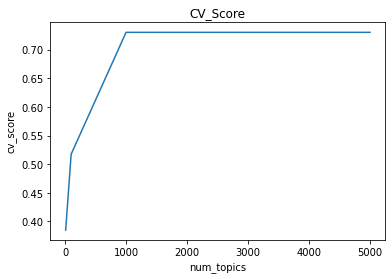

In [32]:
import matplotlib.pyplot as plt 
plt.plot(x, y, label = "line 1") 
plt.xlabel('num_topics') 
# naming the y axis 
plt.ylabel('cv_score') 
plt.title('CV_Score')